GET DATA SET

In [1]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#spliting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using Ensemble method to predict diabetes
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning

In [2]:
diabetes_dataset = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
#How many rows and columns
diabetes_dataset.shape

(70692, 22)

In [4]:
diabetes_dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# select specific columns
diabetes_selected = diabetes_dataset[['HighBP','HighChol','Smoker','Age','Sex','BMI','Fruits','HvyAlcoholConsump','HeartDiseaseorAttack','PhysActivity','Diabetes_binary']]
diabetes_selected.shape

(70692, 11)

In [5]:
diabetes_selected.head()

,HighBP,HighChol,Smoker,Age,Sex,BMI,Fruits,HvyAlcoholConsump,HeartDiseaseorAttack,PhysActivity,Diabetes_binary
0,1.0,0.0,0.0,4.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,12.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,13.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,11.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,8.0,0.0,29.0,1.0,0.0,0.0,1.0,0.0


In [4]:
#Drop Missing Values 
diabetes_selected = diabetes_selected.dropna()
diabetes_selected.shape

(70692, 11)

In [8]:
#Check how many respondents have no diabetes or diabetes.
diabetes_selected.groupby(['Diabetes_binary']).size()


Diabetes_binary
0.0    35346
1.0    35346
dtype: int64

In [9]:
#Checking for Data type of columns
diabetes_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70692 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   Smoker                70692 non-null  float64
 3   Age                   70692 non-null  float64
 4   Sex                   70692 non-null  float64
 5   BMI                   70692 non-null  float64
 6   Fruits                70692 non-null  float64
 7   HvyAlcoholConsump     70692 non-null  float64
 8   HeartDiseaseorAttack  70692 non-null  float64
 9   PhysActivity          70692 non-null  float64
 10  Diabetes_binary       70692 non-null  float64
dtypes: float64(11)
memory usage: 6.5 MB


In [10]:
#statistics summary
diabetes_selected.describe()

,HighBP,HighChol,Smoker,Age,Sex,BMI,Fruits,HvyAlcoholConsump,HeartDiseaseorAttack,PhysActivity,Diabetes_binary
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.475273,8.584055,0.456997,29.856985,0.611795,0.042721,0.147810,0.703036,0.500000
std,0.495960,0.499342,0.499392,2.852153,0.498151,7.113954,0.487345,0.202228,0.354914,0.456924,0.500004
min,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,9.000000,0.000000,29.000000,1.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,11.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,13.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#counting the missing values in numerical features
diabetes_selected.isnull().sum()

HighBP                  0
HighChol                0
Smoker                  0
Age                     0
Sex                     0
BMI                     0
Fruits                  0
HvyAlcoholConsump       0
HeartDiseaseorAttack    0
PhysActivity            0
Diabetes_binary         0
dtype: int64

VISUALISING AND COMPARISM OF SOME COLUMNS

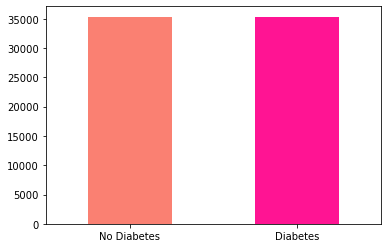

In [12]:
diabetes_selected["Diabetes_binary"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

array([[<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'Smoker'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Diabetes_binary'}>, <AxesSubplot:>]],
      dtype=object)

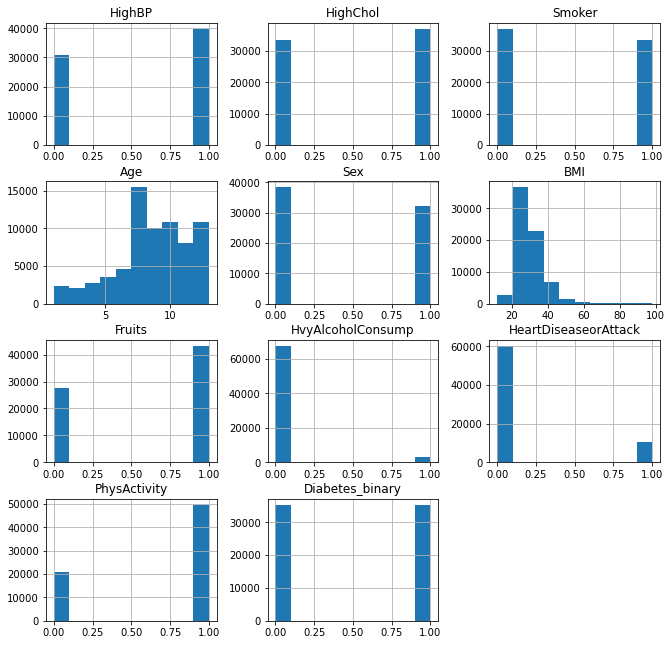

In [13]:
diabetes_selected.hist(figsize=(11,11))

<AxesSubplot:>

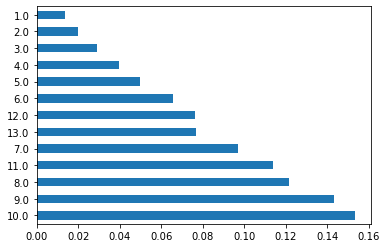

In [14]:
diabetes_selected['Age'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

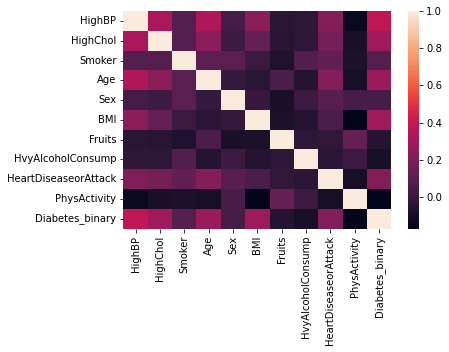

In [15]:
plt.Figure(figsize=(9,9))
sns.heatmap(diabetes_selected.corr())

SPLITTING THE DATASET 

In [6]:
# segregating the target variable
X = diabetes_selected.drop(columns='Diabetes_binary')
y = diabetes_selected['Diabetes_binary']
#spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [8]:
print(f"In X_train dataset there are: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test dataset there are: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

In X_train dataset there are: 56553 rows and 10 columns.
In X_test dataset there are: 14139 rows and 10 columns.
The shape of y_train is: (56553,)
The shape of y_test is: (14139,)


Training the model with 5 algorithms
1.Support Vector Machine
2.KNN
3.Random Forest Classifier
4.Decision Tree
5.Naive Bayes

In [ ]:
# Support Vector Machine (SVM) Model
svm = SVC()
svm.fit(X_train,y_train)

## Evaluating the model
svmscore = svm.score(X_test,y_test)

## Predicting the model
preds_svm= svm.predict(X_test)
print(preds_svm)

In [7]:
## KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);

## Evaluating the model
knnscore = knn.score(X_test,y_test)

## Predicting the model
preds_knn= knn.predict(X_test)
print(preds_knn)

[0. 0. 0. ... 1. 1. 0.]


In [8]:
## Random forest classifier Model
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train);

## Evaluating the model
rfcscore = rfc.score(X_test,y_test)

## Predicting the model
preds_rfc= rfc.predict(X_test)
print(preds_rfc)

[0. 0. 0. ... 1. 0. 1.]


In [9]:
## Decision Tree Model
dtm= DecisionTreeClassifier()
dtm.fit(X_train,y_train);

## Evaluating the model
dtmscore = dtm.score(X_test,y_test)

## Predicting the model
preds_dtm= dtm.predict(X_test)
print(preds_dtm)

[0. 0. 0. ... 1. 0. 0.]


In [10]:
## Naive Bayes Model
nbm= GaussianNB()
nbm.fit(X_train,y_train);

## Evaluating the model
nbmscore = nbm.score(X_test,y_test)

## Predicting the model
preds_nbm= nbm.predict(X_test)
print(preds_nbm)

[1. 0. 0. ... 1. 0. 0.]


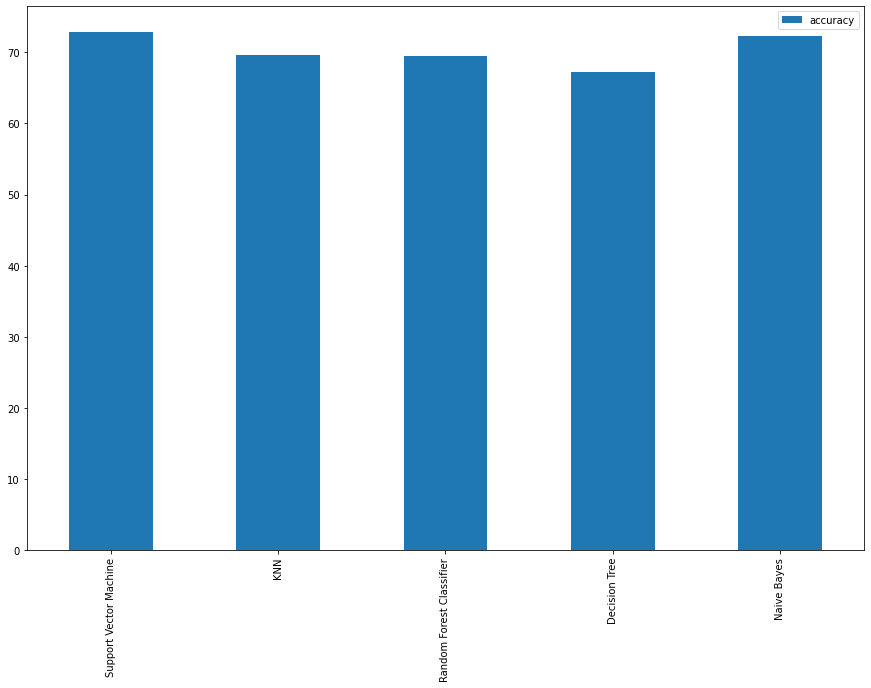

In [23]:
model_compare = pd.DataFrame({"Support Vector Machine":svmscore *100,"KNN":knnscore *100,"Random Forest Classifier":rfcscore *100,"Decision Tree":dtmscore *100,
                              "Naive Bayes":nbmscore *100},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

Evaluating the entire system on Test Data


In [24]:
# Support Vector Machine (SVM) Model
print(f"Support Vector Machine(SVM) accuracy_score : {'{0:.2f}'.format(accuracy_score(y_test,preds_svm)*100)}")
print(classification_report(y_test, preds_svm))


Support Vector Machine(SVM) accuracy_score : 72.84
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      6932
         1.0       0.71      0.79      0.75      7207

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



In [11]:
## KNN Model
print(f"KNN accuracy_score : {'{0:.2f}'.format(accuracy_score(y_test,preds_knn)*100)}")
print(classification_report(y_test, preds_knn))


KNN accuracy_score : 69.57
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69      6932
         1.0       0.70      0.71      0.70      7207

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



In [12]:
## Random forest classifier Model
print(f"Random forest accuracy_score : {'{0:.2f}'.format(accuracy_score(y_test,preds_rfc)*100)}")
print(classification_report(y_test,preds_rfc))


Random forest accuracy_score : 69.24
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68      6932
         1.0       0.69      0.71      0.70      7207

    accuracy                           0.69     14139
   macro avg       0.69      0.69      0.69     14139
weighted avg       0.69      0.69      0.69     14139



In [13]:
## Decision Tree Model
print(f"Decision Tree accuracy_score : {'{0:.2f}'.format(accuracy_score(y_test,preds_dtm)*100)}")
print(classification_report(y_test,preds_dtm))


Decision Tree accuracy_score : 67.20
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68      6932
         1.0       0.69      0.64      0.67      7207

    accuracy                           0.67     14139
   macro avg       0.67      0.67      0.67     14139
weighted avg       0.67      0.67      0.67     14139



In [14]:
## Naive Bayes Model
print(f"Decision Tree accuracy_score : {'{0:.2f}'.format(accuracy_score(y_test,preds_nbm)*100)}")
print(classification_report(y_test,preds_nbm))


Decision Tree accuracy_score : 72.26
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      6932
         1.0       0.72      0.75      0.73      7207

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



IMPLEMENTING ENSEMBLE METHOD

In [29]:
model = VotingClassifier(estimators=[('svm model', svm), ('knn model', knn), ('rfc model', rfc), ('dtm model', dtm), ('nbm model', nbm)], voting='hard')
model.fit(X_train,y_train)
model_score=model.score(X_test,y_test)
preds_ensemble= model.predict(X_test)
print(preds_ensemble)


[0. 0. 0. ... 1. 0. 0.]


In [30]:
print(f"Accuracy of Ensemble Method ={'{0:.2f}'.format(model_score *100)}")

Accuracy of Ensemble Method =71.48


In [31]:
print(classification_report(y_test,preds_ensemble))

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      6932
         1.0       0.71      0.74      0.73      7207

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



Save the Model

In [15]:
import pickle 
#file = open('model.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(nbm , open('model.pkl', 'wb')) #dump information to that file

In [16]:
m=pickle.load(open('model.pkl','rb'))

In [27]:
diabetes_selected[diabetes_selected['Diabetes_binary']==1].iloc[0].values

array([ 1.,  1.,  1.,  9.,  0., 30.,  1.,  0.,  1.,  0.,  1.])

highbp,highcholesterol,smoker,age,sex,bmi,fruits,alcohol,hdoa,physical

In [29]:
m.predict([[1.,  1.,  1.,  9.,  0., 30.,  1.,  0.,  1.,  0.,]])

array([1.])